In [38]:
from numpy import array
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from matplotlib import pyplot as plt

In [66]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
		
	return array(X), array(y)

In [4]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps = 3

# n_features = 1
n_features = 3


In [72]:
# split into samples
X, y = split_sequence(raw_seq, n_steps)

y = array([
    [40, 41, 42],
    [50, 51, 52],
    [60, 61, 63],
    [70, 70, 70], 
    [80, 80, 80],
    [90, 90, 90]
])
X = array([
    [10, 20, 30],
    [20, 30, 40],
    [30, 40, 50],
    [40, 50, 60],
    [50, 60, 70],
    [60, 70, 80]
])

In [73]:
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[10 20 30] [40 41 42]
[20 30 40] [50 51 52]
[30 40 50] [60 61 63]
[40 50 60] [70 70 70]
[50 60 70] [80 80 80]
[60 70 80] [90 90 90]


In [74]:
# reshape from [samples, timesteps] into [samples, timesteps, features]

X = X.reshape((X.shape[0], X.shape[1], n_features))

In [78]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(3))
model.compile(optimizer='adam', loss='mse')

In [79]:
# fit model
model.fit(X, y, epochs=50, verbose=0)

[[107.13299 122.3311  100.20294]]


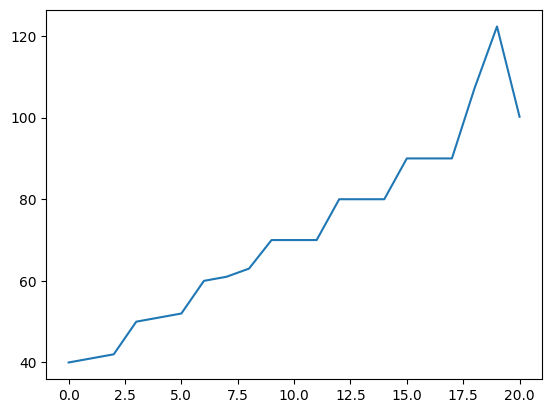

In [80]:
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

y_predict = np.append(y,[yhat])

plt.plot(y_predict)

# plt.plot(x_show, label='line 1')
# plt.legend()
# plt.show()
print(yhat)